In [2]:
import os
import pandas as pd

from fast_ml.feature_selection import get_constant_features
 
dataset = pd.DataFrame()

directory = "../data_sets/raw_state_samples"
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(filepath):
        sub_dataset = pd.read_csv(filepath)
        dataset = pd.concat([dataset, sub_dataset], axis=0)        

In [3]:
# 3 Status Features
time_status_columns = ['time', 'timestamp', 'seconds']
try:
    dataset.drop(time_status_columns, inplace=True, axis=1)
except:
    print("All time status features are removed from the dataset")
assert len(dataset.columns) == 97

In [4]:
constant_features = set(get_constant_features(dataset, threshold=0.99, dropna=False)['Var'])
try:
    dataset.drop(constant_features, inplace=True, axis=1)
except:
    print("All constant features are removed from the dataset")
assert len(dataset.columns) == 85

In [5]:
import pandas as pd

correlation_matrix = dataset.corr().abs()


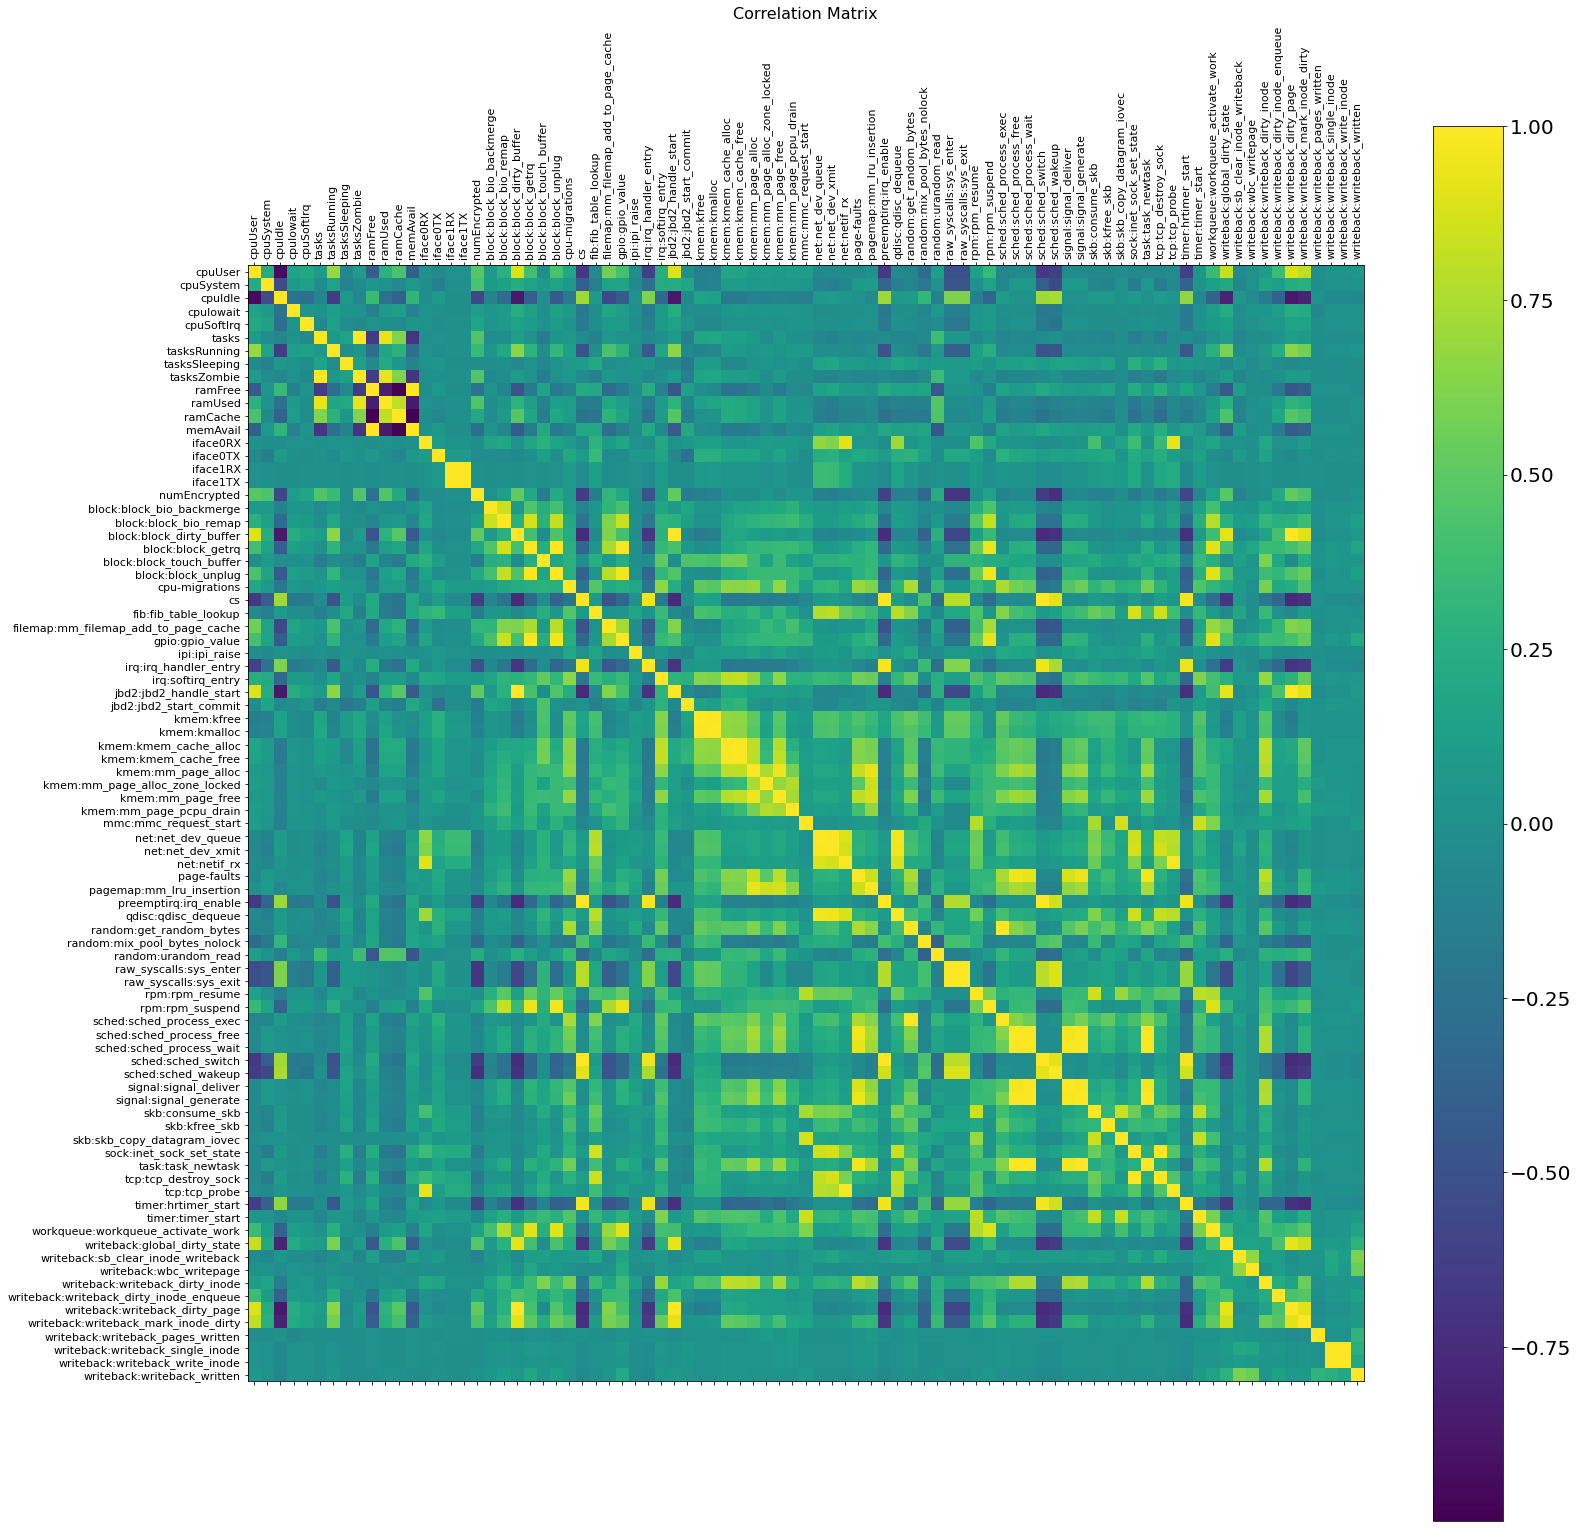

In [7]:
import matplotlib.pyplot as plt
df = dataset
f = plt.figure(figsize=(25, 25))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=11, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=11)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title('Correlation Matrix', fontsize=16);

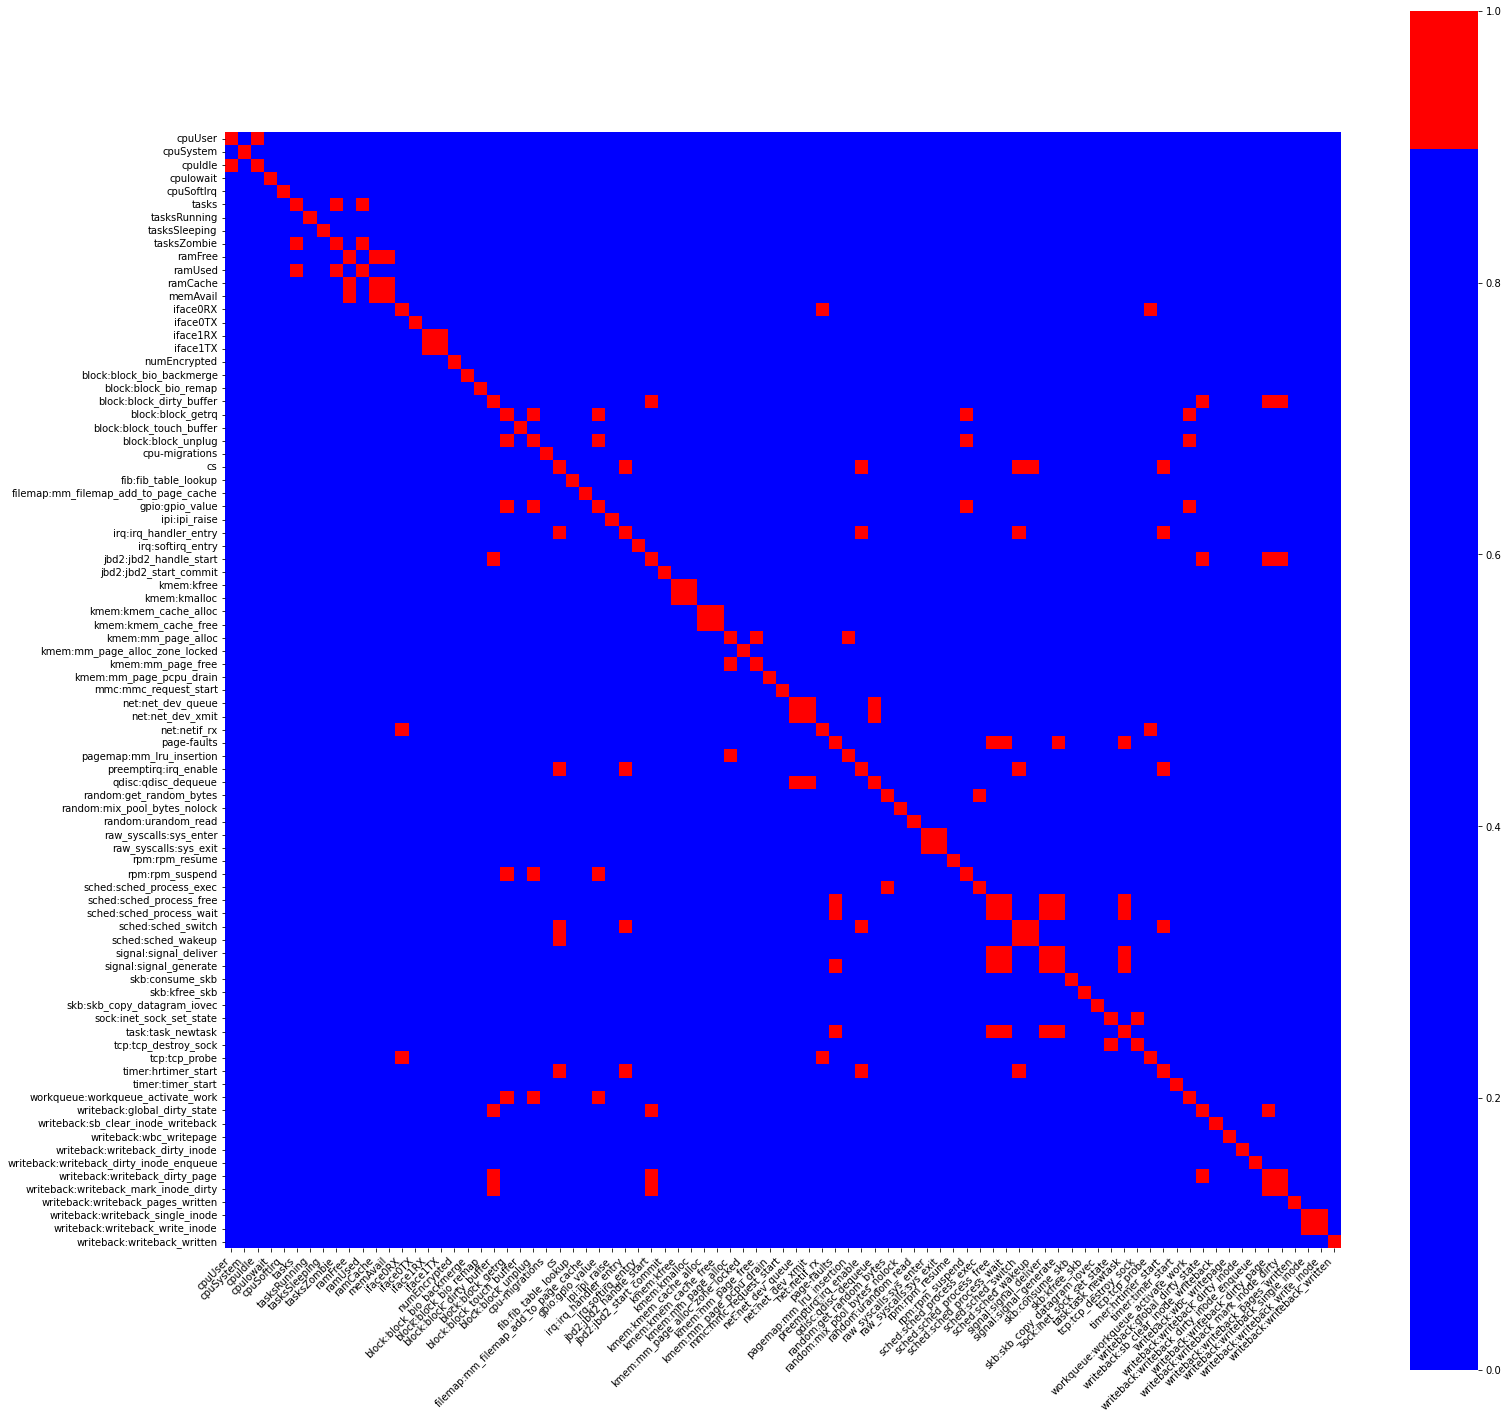

In [8]:
import seaborn as sns
plt.figure(figsize=(25, 25))
from matplotlib.colors import LinearSegmentedColormap

colors = ((0.0, 0.0, 1.0), (1.0, 0.0, 0.0))
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

ax = sns.heatmap(
    correlation_matrix, 
    vmin=0, vmax=1, center=0.9,
    cmap=cmap,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [16]:
import numpy as np 
correlation_matrix = df.corr().abs()
highly_correlated_variables=np.where(corr_matrix>0.95)
highly_correlated_variables=[(correlation_matrix.columns[x],correlation_matrix.columns[y]) for x,y in zip(*highly_correlated_variables) if x!=y and x<y]
print(len(highly_correlated_variables))
print(highly_correlated_variables)

41
[('tasks', 'tasksZombie'), ('ramFree', 'ramCache'), ('ramFree', 'memAvail'), ('ramCache', 'memAvail'), ('iface1RX', 'iface1TX'), ('block:block_dirty_buffer', 'jbd2:jbd2_handle_start'), ('block:block_dirty_buffer', 'writeback:writeback_dirty_page'), ('block:block_getrq', 'block:block_unplug'), ('block:block_getrq', 'gpio:gpio_value'), ('block:block_unplug', 'gpio:gpio_value'), ('block:block_unplug', 'rpm:rpm_suspend'), ('cs', 'preemptirq:irq_enable'), ('cs', 'sched:sched_switch'), ('cs', 'timer:hrtimer_start'), ('irq:irq_handler_entry', 'preemptirq:irq_enable'), ('jbd2:jbd2_handle_start', 'writeback:writeback_dirty_page'), ('kmem:kfree', 'kmem:kmalloc'), ('kmem:kmem_cache_alloc', 'kmem:kmem_cache_free'), ('net:net_dev_queue', 'net:net_dev_xmit'), ('net:net_dev_queue', 'qdisc:qdisc_dequeue'), ('net:net_dev_xmit', 'qdisc:qdisc_dequeue'), ('net:netif_rx', 'tcp:tcp_probe'), ('page-faults', 'sched:sched_process_free'), ('page-faults', 'task:task_newtask'), ('preemptirq:irq_enable', 'sched

In [18]:
import numpy as np
# get upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# find features with correlation greater than 0.95

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)
print(len(to_drop))

['tasksZombie', 'ramCache', 'memAvail', 'iface1TX', 'block:block_unplug', 'gpio:gpio_value', 'jbd2:jbd2_handle_start', 'kmem:kmalloc', 'kmem:kmem_cache_free', 'net:net_dev_xmit', 'preemptirq:irq_enable', 'qdisc:qdisc_dequeue', 'raw_syscalls:sys_exit', 'rpm:rpm_suspend', 'sched:sched_process_exec', 'sched:sched_process_free', 'sched:sched_process_wait', 'sched:sched_switch', 'signal:signal_deliver', 'signal:signal_generate', 'task:task_newtask', 'tcp:tcp_destroy_sock', 'tcp:tcp_probe', 'timer:hrtimer_start', 'writeback:writeback_dirty_page', 'writeback:writeback_write_inode']
26


In [29]:
upper np.triu([np.ones([5,5])], 0)

array([[[1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 1.]]])

In [22]:
print(upper.shape)

(85, 85)


In [30]:
import numpy as np

# Create correlation matrix
corr_matrix = dataset.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]

# Drop features 
#df.drop(to_drop, axis=1, inplace=True)
print(to_drop)
print(len(to_drop))

['tasksZombie', 'ramCache', 'memAvail', 'iface1TX', 'jbd2:jbd2_handle_start', 'raw_syscalls:sys_exit', 'sched:sched_process_exec', 'sched:sched_switch', 'signal:signal_generate', 'task:task_newtask', 'writeback:writeback_dirty_page', 'writeback:writeback_write_inode']
12


In [73]:
print(dataset.shape)

(71426, 85)


In [118]:
df.corr().head(100)

,time,timestamp,seconds,connectivity,cpuUser,cpuSystem,cpuNice,cpuIdle,cpuIowait,cpuHardIrq,...,writeback:sb_clear_inode_writeback,writeback:wbc_writepage,writeback:writeback_dirty_inode,writeback:writeback_dirty_inode_enqueue,writeback:writeback_dirty_page,writeback:writeback_mark_inode_dirty,writeback:writeback_pages_written,writeback:writeback_single_inode,writeback:writeback_write_inode,writeback:writeback_written
time,1.000000,0.999999,0.003064,NaN,0.014124,0.072886,NaN,-0.053622,-0.022169,NaN,...,0.139348,0.090824,0.004831,0.115583,0.140307,0.024119,0.016102,0.161386,0.145230,0.125253
timestamp,0.999999,1.000000,0.003088,NaN,0.014132,0.072964,NaN,-0.053671,-0.022153,NaN,...,0.139254,0.090743,0.004814,0.115531,0.140254,0.024096,0.016107,0.161294,0.145163,0.125182
seconds,0.003064,0.003088,1.000000,NaN,-0.044632,-0.011701,NaN,0.044493,0.000270,NaN,...,-0.010184,-0.020936,0.014007,-0.015988,-0.024517,0.010928,0.014488,-0.026553,-0.023093,-0.025743
connectivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpuUser,0.014124,0.014132,-0.044632,NaN,1.000000,-0.002111,NaN,-0.829564,-0.000007,NaN,...,0.030224,-0.002049,-0.146518,0.012071,0.027562,-0.142926,0.023065,0.027812,0.032722,0.023212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
writeback:writeback_mark_inode_dirty,0.024119,0.024096,0.010928,NaN,-0.142926,-0.019143,NaN,0.128031,0.023635,NaN,...,0.096813,0.071745,0.989851,0.119726,0.120424,1.000000,-0.006222,0.099279,0.083122,0.087313
writeback:writeback_pages_written,0.016102,0.016107,0.014488,NaN,0.023065,-0.034362,NaN,-0.000397,0.003721,NaN,...,0.061510,0.060228,-0.008869,0.028745,0.018519,-0.006222,1.000000,0.075977,0.069401,0.274509
writeback:writeback_single_inode,0.161386,0.161294,-0.026553,NaN,0.027812,0.017580,NaN,-0.033783,-0.019321,NaN,...,0.826564,0.635284,0.013340,0.602001,0.612054,0.099279,0.075977,1.000000,0.892544,0.909313
writeback:writeback_write_inode,0.145230,0.145163,-0.023093,NaN,0.032722,0.007015,NaN,-0.031329,-0.016602,NaN,...,0.584742,0.233264,0.014246,0.403421,0.488999,0.083122,0.069401,0.892544,1.000000,0.799269


In [68]:
threshold = 0.95
correlation_matrix = df.corr()
correlations = {}
for this_feature in correlation_matrix:
    #print(row)
    correlations[this_feature] = []
    #print(corr_matrix[row])
    #for column in corr_matrix[row]:
    for other_feature, feature_correlation in correlation_matrix[this_feature].iteritems():
        #print(column)
        if this_feature == other_feature:
            continue
        
        if feature_correlation > threshold:
            correlations[this_feature].append(other_feature)
    #print(type(corr_matrix[row]))
    
n_correlated_features = 0
for this_feature, correlated_features in correlations.items():
    if len(correlated_features) > 0:
        n_correlated_features+=1
        print(f"{this_feature} => {correlated_features}")
print(n_correlated_features)

tasks => ['tasksZombie']
tasksZombie => ['tasks']
ramFree => ['memAvail']
memAvail => ['ramFree']
iface1RX => ['iface1TX']
iface1TX => ['iface1RX']
block:block_dirty_buffer => ['jbd2:jbd2_handle_start', 'writeback:writeback_dirty_page']
block:block_getrq => ['block:block_unplug', 'gpio:gpio_value']
block:block_unplug => ['block:block_getrq', 'gpio:gpio_value', 'rpm:rpm_suspend']
cs => ['preemptirq:irq_enable', 'sched:sched_switch', 'timer:hrtimer_start']
gpio:gpio_value => ['block:block_getrq', 'block:block_unplug']
irq:irq_handler_entry => ['preemptirq:irq_enable']
jbd2:jbd2_handle_start => ['block:block_dirty_buffer', 'writeback:writeback_dirty_page']
kmem:kfree => ['kmem:kmalloc']
kmem:kmalloc => ['kmem:kfree']
kmem:kmem_cache_alloc => ['kmem:kmem_cache_free']
kmem:kmem_cache_free => ['kmem:kmem_cache_alloc']
net:net_dev_queue => ['net:net_dev_xmit', 'qdisc:qdisc_dequeue']
net:net_dev_xmit => ['net:net_dev_queue', 'qdisc:qdisc_dequeue']
net:netif_rx => ['tcp:tcp_probe']
page-faults 

/var/folders/8v/42fl0kws5cs5j84mbf8mbhbh0000gn/T/ipykernel_53384/20239431.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for other_feature, feature_correlation in correlation_matrix[this_feature].iteritems():


In [74]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# define number of features to keep

k = 10

# perform feature selection

X_new = SelectKBest(f_regression, k=k).fit_transform(X, y)

# get feature names of selected features

selected_features = X.columns[SelectKBest(f_regression, k=k).fit(X, y).get_support()]

# print selected features

print(selected_features)



NameError: name 'X' is not defined